# Stratification

Developer: Seyed.kahaki@fda.hhs.gov

When preparing datasets for machine learning, it is crucial to ensure that the training, validation, and test sets reflect the overall class distribution. **Stratification** is a technique used to split data such that each subset maintains the same proportion of classes (or subcategories) as the original dataset.

In this notebook, we explore both **random** and **stratified** data splitting strategies using the **BreakHis** breast cancer histopathology dataset. We apply stratification at two levels:

- **Category level**: *benign* vs *malignant*
- **Subtype level**: specific tumor types within each category

This approach helps create a more balanced and representative distribution across all data splits, which is especially important when working with **imbalanced datasets** in medical imaging.


# import necessary libraraies

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from WSI.stratification import stratification 

# Dataset Overview

We utilized the publicly available **BreakHis** dataset from [Kaggle](https://www.kaggle.com/datasets/ambarish/breakhis) for our analysis. The **Breast Cancer Histopathological Image Classification (BreakHis)** dataset consists of **9,109 microscopic images** of breast tumor tissues collected from **82 patients**, captured under varying magnification levels (**40X, 100X, 200X, and 400X**). It includes:

- **2,480 benign** samples  
- **5,429 malignant** samples  

Each image is in **PNG format**, with a resolution of **700×460 pixels**, **3-channel RGB**, and **8-bit depth per channel**.

The dataset was developed in collaboration with the **P&D Laboratory – Pathological Anatomy and Cytopathology** in Paraná, Brazil ([www.prevencaoediagnose.com.br](http://www.prevencaoediagnose.com.br)).

---

For our study, we focused on images captured at **40X magnification** to compare **random** versus **stratified** data splitting strategies. The data was further grouped into the following subcategories:

- **Benign**: `adenosis`, `fibroadenoma`, `phyllodes_tumor`, `tubular_adenoma`  
- **Malignant**: `ductal_carcinoma`, `lobular_carcinoma`, `mucinous_carcinoma`, `papillary_carcinoma`

We then applied and compared both splitting strategies at the **category level** (benign vs. malignant) and **subtype level** to evaluate their distribution across **train**, **validation**, and **test** sets.


In [9]:
# User-defined dataset path and structure
root_dir = input("Enter the root directory path of your dataset: ")
categories = {
    "benign": {
        "path": f"{root_dir}/benign/SOB",
        "subcategories": ["adenosis", "fibroadenoma", "phyllodes_tumor", "tubular_adenoma"]
    },
    "malignant": {
        "path": f"{root_dir}/malignant/SOB",
        "subcategories": ["ductal_carcinoma", "lobular_carcinoma", "mucinous_carcinoma", "papillary_carcinoma"]
    }
}

Enter the root directory path of your dataset:  /home/tanviben.patel/ondemand/data/Datasets/BreakHis_v1_Stratification_magnification_40x/histology_breast_slides/


# Original dataset category distribution

/home/tanviben.patel/ondemand/data/ValidPath-main/ValidPath2_20250404/WSI/stratification.py:164: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette="Set2")


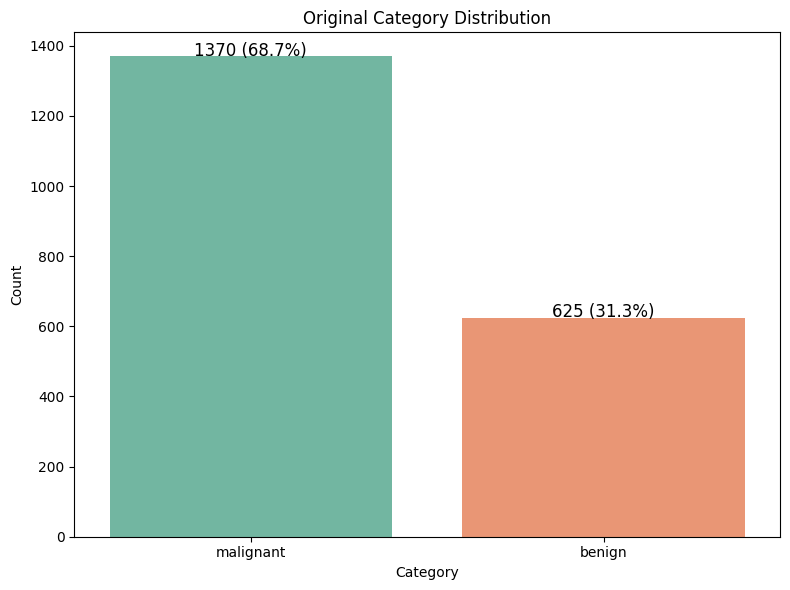

In [5]:
# Initialize
strat = stratification(root_dir=root_dir, categories=categories)

# Visualize category distribution
strat.plot_category_distribution(strat.df, "Original Category Distribution")

# Random split by category

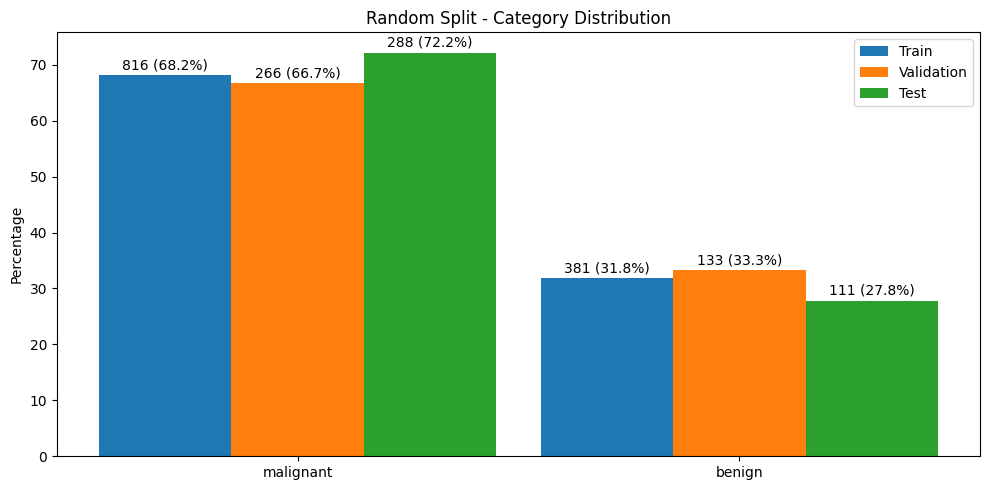

In [11]:
# Random split by category
train_cat_r, val_cat_r, test_cat_r = strat.split_random_by_category()
cat_random_splits = {
    "Train": train_cat_r["category"].value_counts().to_dict(),
    "Validation": val_cat_r["category"].value_counts().to_dict(),
    "Test": test_cat_r["category"].value_counts().to_dict()
}
strat.plot_category_split_distribution(cat_random_splits, "Random Split - Category Distribution")

# Stratified split by category

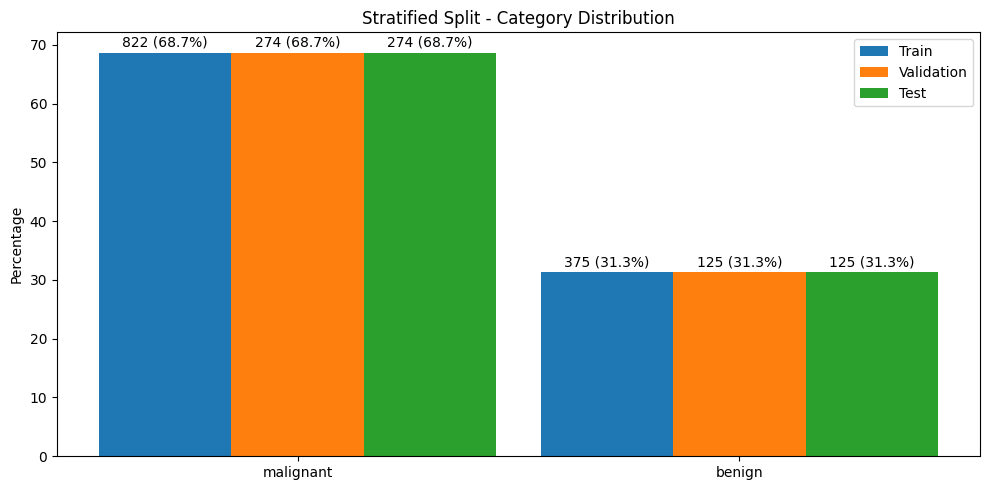

In [10]:
# Stratified split by category
train_cat_s, val_cat_s, test_cat_s = strat.split_stratified_by_category()
cat_stratified_splits = {
    "Train": train_cat_s["category"].value_counts().to_dict(),
    "Validation": val_cat_s["category"].value_counts().to_dict(),
    "Test": test_cat_s["category"].value_counts().to_dict()
}
strat.plot_category_split_distribution(cat_stratified_splits, "Stratified Split - Category Distribution")

# Random split by sub category

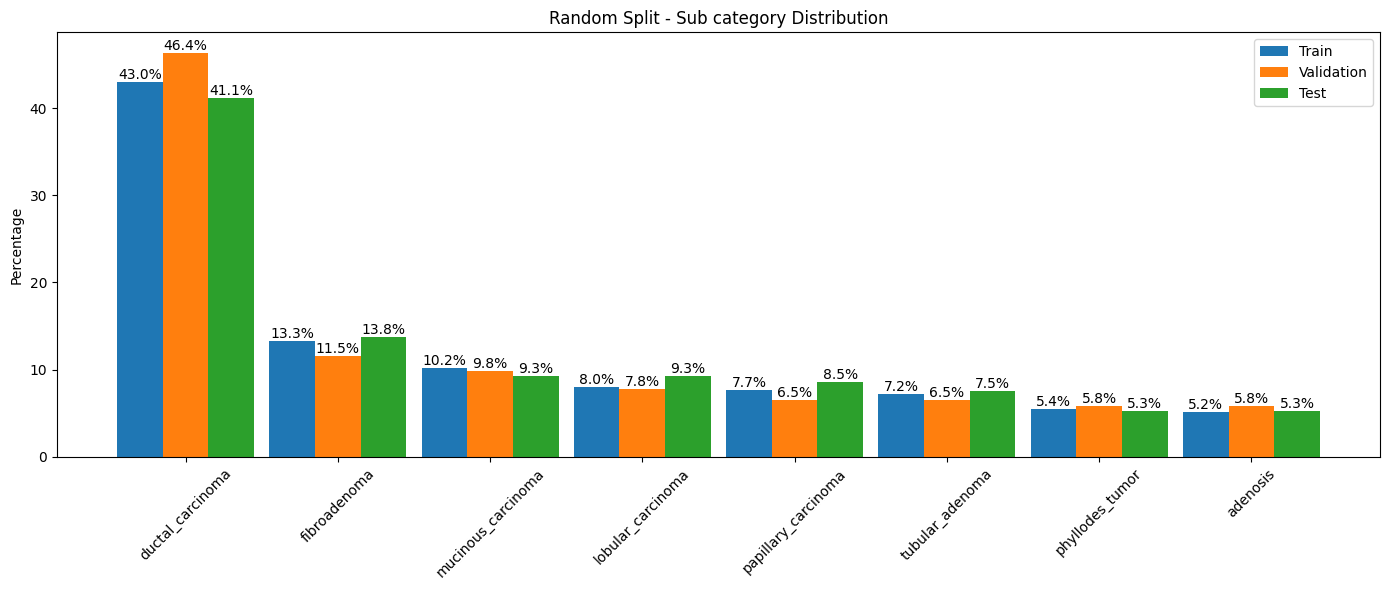

In [12]:
# Random split
train_r, val_r, test_r = strat.split_random()
random_splits = {
    "Train": train_r["subtype"].value_counts().to_dict(),
    "Validation": val_r["subtype"].value_counts().to_dict(),
    "Test": test_r["subtype"].value_counts().to_dict()
}
strat.plot_subtype_distribution(random_splits, "Random Split - Sub category Distribution")

# Stratified split by sub category

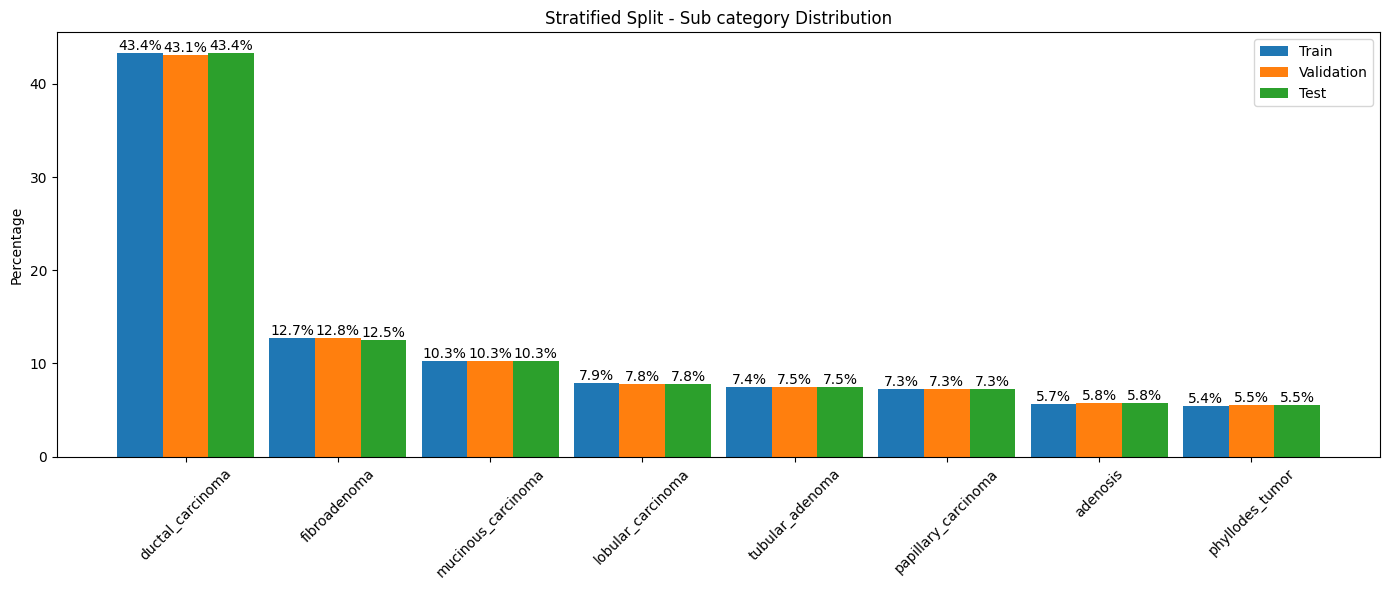

In [13]:
# Stratified split
train_s, val_s, test_s = strat.split_stratified()
stratified_splits = {
    "Train": train_s["subtype"].value_counts().to_dict(),
    "Validation": val_s["subtype"].value_counts().to_dict(),
    "Test": test_s["subtype"].value_counts().to_dict()
}
strat.plot_subtype_distribution(stratified_splits, "Stratified Split - Sub category Distribution")

In [15]:
print("Thank you for using the Stratification Splitting Notebook.")

Thank you for using the Stratification Splitting Notebook.
